In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [54]:
# Load dataset
df = pd.read_csv("Student_Performance.csv")

# Rename columns to avoid spaces
df = df.rename(columns=lambda x: x.replace(" ", "_"))

# Handle categorical variables (convert "Yes" to 1 and "No" to 0)
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

# Define X (features) and y (target variable)
y = df['Performance_Index']
X = df.drop(columns=['Performance_Index'])


In [55]:
# Standardize the numerical features (excluding categorical ones)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Add a constant (intercept) AFTER standardization
X_scaled = sm.add_constant(X_scaled)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()


In [56]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)


In [57]:
# Display the model summary
print(model.summary())
print(f'Mean Squared Error: {mse}')


                            OLS Regression Results                            
Dep. Variable:      Performance_Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:01:40   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

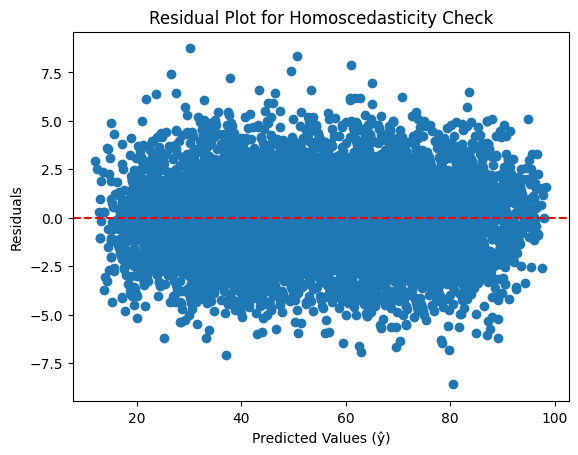

In [58]:
# Residual plot to check homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (ŷ)")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity Check")
plt.show()


In [59]:
# Checking VIF for multicollinearity (excluding intercept)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns[1:]  # Excluding 'const'
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i+1) for i in range(len(X_scaled.columns)-1)]
print(vif_data)


                            Feature       VIF
0                     Hours_Studied  1.000478
1                   Previous_Scores  1.000326
2        Extracurricular_Activities  1.000802
3                       Sleep_Hours  1.000600
4  Sample_Question_Papers_Practiced  1.000557
